# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grades

## Learning Objectives

The objective of this experiment is to observe the Decision surface of a decision tree with different depths.

## Dataset

#### History

This is a multivariate dataset introduced by R.A.Fisher (Father of Modern Statistics) for showcasing linear discriminant analysis. This is arguably the best known dataset in Feature Selection literature.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances. 


For each flower we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

To make our experiment easy we rename the classes  with numbers : 

    "0": setosa
    "1": versicolor
    "2": virginica
    

### Challenges

When we use the data with large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with number of features.
    2. Models have increasing risk of overfitting with increasing number of features.
    
To avoid the above mentioned problems while learning about data analysis, we use simple, well behaved, data that reduces the cognitive load, and makes it easier to debug as we are able to better comprehend the data we are working with.  

Hence, this is a good dataset to work on.

## Domain Information



Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives excellent background. 

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


### Setup Steps

#### Importing the Required Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

#### Parameters

In [0]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.5

#### Loading the data

In [0]:
# Load data
iris = load_iris()
Depth = 7
PAIRWISE = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

#### Training the classifier

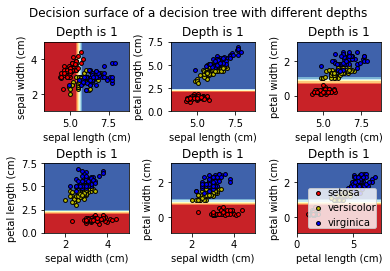

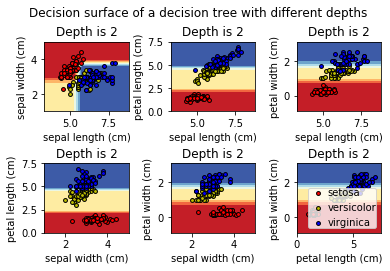

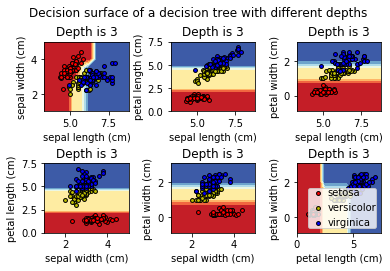

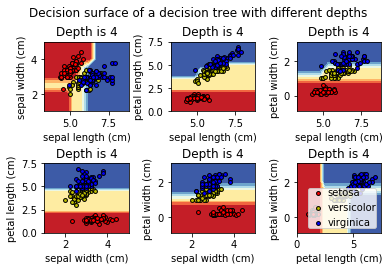

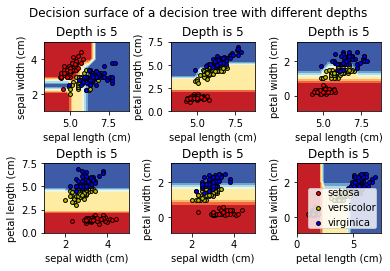

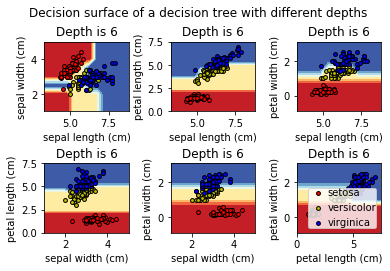

In [9]:
for depth in range(1,Depth):
    plt.figure()
    for pairidx, pair in enumerate(PAIRWISE):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target
        clf = DecisionTreeClassifier(max_depth = depth,criterion='entropy').fit(X, y)
        plt.subplot(2, 3, pairidx+1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
                                   
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        plt.title("Depth is" + " " + str(depth))
    # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    plt.suptitle("Decision surface of a decision tree with different depths")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
plt.show()